In [1]:
#Welcome to the Worlds of Belief Project!
#Below is the code for a multivariable Deep Neural Network (DNN)
#analyzing the relationship between 6 cultural belief predictors on democracy.


In [2]:
#Load the necessary libraries.

import os  # Library for interacting with the operating system, providing functions for file and directory manipulation.
import pandas as pd  # Pandas is a popular data manipulation and analysis library in Python.
import statsmodels.formula.api as smf  # Library for statistical modeling and analysis using formulas,
                                      # providing a high-level interface for specifying and fitting statistical models.
import statsmodels.api as sm  # Library for statistical modeling and analysis, providing a low-level interface for specifying
                               # and fitting statistical models.
from statsmodels.stats.outliers_influence import reset_ramsey  # to perform the RESET test
import scipy.stats as stats  # Library for statistical functions and distributions, providing a wide range of statistical tools
                              # and probability distributions.
from scipy.stats import zscore
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations in Python, providing a
                                  # MATLAB-like plotting interface.
import seaborn as sns  # Library for statistical data visualization, providing high-level functions for creating informative
                        # and attractive statistical graphics.
import numpy as np  # Library for numerical computing, providing efficient array operations and mathematical functions for
                     # working with numerical data.
from sklearn.metrics import mean_squared_error

print(os.getcwd())  # Print the current working directory

c:\Users\ryant\tensorflow_env


In [3]:
#Load the necessary libraries in relation to Tensorflow.

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
print(tf.__version__)

2.12.0


In [4]:
#Load in all the relevant datasets, reading them as an excel spreadsheet.
#First six rows are skipped due to the structure of the xls files.

#Loads in the Democracy Index dataset.
rep_gov_IDEA = pd.read_excel('Representative_Government_IDEA.xlsx')

#Loads in the Family Index dataset.
Q1_Family = pd.read_excel('Important_in_life_Family.xls', skiprows = 6)

#Loads in the Friends Index dataset.
Q2_Friends = pd.read_excel('Important_in_life_Friends.xls', skiprows = 6)

#Loads in the Leisure Index dataset.
Q3_Leisure = pd.read_excel('Important_in_life_Leisure_time.xls', skiprows = 6)

#Loads in the Politics Index dataset.
Q4_Politics = pd.read_excel('Important_in_life_Politics.xls', skiprows = 6)

#Loads in the Religion Index dataset.
Q5_Religion = pd.read_excel('Important_in_life_Religion.xls', skiprows = 6)

#Loads in the Work Index dataset.
Q6_Work = pd.read_excel('Important_in_life_Work.xls', skiprows = 6)


In [5]:
# Define the DataFrame titles and create a dictionary.
title_dict = {
    'Q1_Family' : '**Q1_Family**',
    'Q2_Friends': '**Q2_Friends**',
    'Q3_Leisure': '**Q3_Leisure**',
    'Q4_Politics': '**Q4_Politics**',
    'Q5_Religion': '**Q5_Religion**',
    'Q6_Work': '**Q6_Work**'}


# Display the first few rows of each DataFrame with the corresponding title
print(title_dict['Q1_Family'])
print(Q1_Family.head(2))
print()

print(title_dict['Q2_Friends'])
print(Q2_Friends.head(2))
print()

print(title_dict['Q3_Leisure'])
print(Q3_Leisure.head(2))
print()

print(title_dict['Q4_Politics'])
print(Q4_Politics.head(2))
print()

print(title_dict['Q5_Religion'])
print(Q5_Religion.head(2))
print()

print(title_dict['Q6_Work'])
print(Q6_Work.head(2))
print()

**Q1_Family**
         Unnamed: 0       Unnamed: 1  Albania  Andorra  Azerbaijan  Argentina  \
0    Very important  88.9% (136,829)     97.4     89.5        90.7       91.7   
1  Rather important    9.6% (14,709)      1.9      9.7         8.4        8.2   

   Australia  Austria  Bangladesh  Armenia  ...  Tunisia  Turkey  Ukraine  \
0       90.2     82.3        98.6     91.7  ...     97.4    91.8     85.0   
1        7.4     13.8         1.3      7.5  ...      2.1     7.4     13.0   

   North Macedonia  Egypt  Great Britain  United States  Uruguay  Venezuela  \
0             94.6   99.7           91.7           91.0     91.4       83.4   
1              3.7    0.3            6.9            7.1      7.8       15.7   

   Northern Ireland  
0              94.8  
1               4.7  

[2 rows x 92 columns]

**Q2_Friends**
         Unnamed: 0      Unnamed: 1  Albania  Andorra  Azerbaijan  Argentina  \
0    Very important  45.4% (69,952)     36.0     54.9        26.1       51.9   
1  Rath

In [6]:
#Merging the data into a comprehensive dataset.
 
data_frames = [Q1_Family, Q2_Friends, Q3_Leisure, Q4_Politics, Q5_Religion, Q6_Work]

# Iterate over the data frames
for df in data_frames:
    # Get all columns except the first two
    cols_to_scale = df.columns[2:]
    
    # Scale columns 3 to 92 and rows 0 to 7
    df.loc[:7, cols_to_scale] = df.loc[:7, cols_to_scale] / 100
    
    # Display the first few rows of the DataFrame
    print(df.head(3))
    print()

           Unnamed: 0       Unnamed: 1  Albania  Andorra  Azerbaijan  \
0      Very important  88.9% (136,829)    0.974    0.895       0.907   
1    Rather important    9.6% (14,709)    0.019    0.097       0.084   
2  Not very important     1.1% (1,650)    0.003    0.005       0.007   

   Argentina  Australia  Austria  Bangladesh  Armenia  ...  Tunisia  Turkey  \
0      0.917      0.902    0.823       0.986    0.917  ...    0.974   0.918   
1      0.082      0.074    0.138       0.013    0.075  ...    0.021   0.074   
2      0.001      0.015    0.034       0.001    0.005  ...    0.004   0.006   

   Ukraine  North Macedonia  Egypt  Great Britain  United States  Uruguay  \
0    0.850            0.946  0.997          0.917          0.910    0.914   
1    0.130            0.037  0.003          0.069          0.071    0.078   
2    0.013            0.004  0.000          0.010          0.016    0.003   

   Venezuela  Northern Ireland  
0      0.834             0.948  
1      0.157       

In [7]:
#Creates Dataframes and respective titles

data_frames = [Q1_Family, Q2_Friends, Q3_Leisure, Q4_Politics, Q5_Religion, Q6_Work]
titles = ['Q1_Family', 'Q2_Friends', 'Q3_Leisure', 'Q4_Politics', 'Q5_Religion', 'Q6_Work']

# Iterate over the data frames
for df, title in zip(data_frames, titles):
    # Checking for missing values in the current data frame
    missing_values = df.head(9).isnull().sum()
    
    # Print the title and missing values
    print("Missing values in", title, ":\n", missing_values)
    print()

Missing values in Q1_Family :
 Unnamed: 0          0
Unnamed: 1          1
Albania             0
Andorra             0
Azerbaijan          0
                   ..
Great Britain       0
United States       0
Uruguay             0
Venezuela           0
Northern Ireland    0
Length: 92, dtype: int64

Missing values in Q2_Friends :
 Unnamed: 0          0
Unnamed: 1          1
Albania             0
Andorra             0
Azerbaijan          0
                   ..
Great Britain       0
United States       0
Uruguay             0
Venezuela           0
Northern Ireland    0
Length: 92, dtype: int64

Missing values in Q3_Leisure :
 Unnamed: 0          0
Unnamed: 1          1
Albania             0
Andorra             0
Azerbaijan          0
                   ..
Great Britain       0
United States       0
Uruguay             0
Venezuela           0
Northern Ireland    0
Length: 92, dtype: int64

Missing values in Q4_Politics :
 Unnamed: 0          1
Unnamed: 1          1
Albania             0
An

In [8]:
# Iterate over the data frames
for df, title in zip(data_frames, titles):
    # Selecting the 8th row and all but the first two columns
    df_cut = df.iloc[7, 2:]
    
    # Creating a new DataFrame with the selected row and columns
    df_cut = pd.DataFrame(df_cut).T
    
    # Resetting the column index
    df_cut.reset_index(drop=True, inplace=True)
    
    # Print the title
    print(title)
    
    # Print the first three rows of the new DataFrame
    print(df_cut.head(3))
    
    # Print a blank line
    print()
    
    # Transposing the DataFrame
    df_cut_t = df_cut.T
    
    # Resetting the index and renaming the columns
    df_cut_t.reset_index(inplace=True)
    df_cut_t.columns = ["Country name", title + "Cut"]
    
    # Print the title
    print(title)
    
    # Print the transposed DataFrame
    print(df_cut_t.head(3))
    
    # Print a blank line
    print()
    
    # Assign the transposed DataFrame to the respective variable name
    globals()[title + "Cut_T"] = df_cut_t

Q1_Family
    Albania   Andorra Azerbaijan Argentina Australia   Austria Bangladesh  \
0  0.987667  0.961333   0.965333     0.972  0.956333  0.926333      0.995   

    Armenia   Bolivia Bosnia Herzegovina  ...   Tunisia    Turkey Ukraine  \
0  0.968667  0.931667           0.972667  ...  0.989333  0.969333   0.941   

  North Macedonia  Egypt Great Britain United States Uruguay Venezuela  \
0           0.972  0.999      0.966333      0.962667   0.967  0.941333   

  Northern Ireland  
0            0.981  

[1 rows x 90 columns]

Q1_Family
  Country name Q1_FamilyCut
0      Albania     0.987667
1      Andorra     0.961333
2   Azerbaijan     0.965333

Q2_Friends
  Albania Andorra Azerbaijan Argentina Australia   Austria Bangladesh  \
0   0.753   0.822      0.695  0.795333  0.807667  0.848667   0.641667   

    Armenia   Bolivia Bosnia Herzegovina  ... Tunisia    Turkey Ukraine  \
0  0.756333  0.542333              0.808  ...   0.751  0.859333   0.727   

  North Macedonia     Egypt Great

In [9]:
#Rename the data frame columns for each predictor.
Q1_FamilyCut_T.rename(columns={'Q1_FamilyCut': 'Family Index'}, inplace=True)
print(Q1_FamilyCut_T.head(4))
print()

Q2_FriendsCut_T.rename(columns={'Q2_FriendsCut': 'Friends Index'}, inplace=True)
print(Q2_FriendsCut_T.head(4))
print()

Q3_LeisureCut_T.rename(columns={'Q3_LeisureCut': 'Leisure Index'}, inplace=True)
print(Q3_LeisureCut_T.head(4))
print()

Q4_PoliticsCut_T.rename(columns={'Q4_PoliticsCut': 'Politics Index'}, inplace=True)
print(Q4_PoliticsCut_T.head(4))
print()

Q5_ReligionCut_T.rename(columns={'Q5_ReligionCut': 'Religion Index'}, inplace=True)
print(Q5_ReligionCut_T.head(4))
print()

Q6_WorkCut_T.rename(columns={'Q6_WorkCut': 'Work Index'}, inplace=True)
print(Q6_WorkCut_T.head(4))

  Country name Family Index
0      Albania     0.987667
1      Andorra     0.961333
2   Azerbaijan     0.965333
3    Argentina        0.972

  Country name Friends Index
0      Albania         0.753
1      Andorra         0.822
2   Azerbaijan         0.695
3    Argentina      0.795333

  Country name Leisure Index
0      Albania      0.656667
1      Andorra      0.859333
2   Azerbaijan         0.671
3    Argentina         0.705

  Country name Politics Index
0      Albania       0.234333
1      Andorra          0.353
2   Azerbaijan          0.365
3    Argentina       0.355667

  Country name Religion Index
0      Albania          0.621
1      Andorra       0.344667
2   Azerbaijan       0.521333
3    Argentina       0.569333

  Country name Work Index
0      Albania   0.924667
1      Andorra   0.823667
2   Azerbaijan   0.800333
3    Argentina   0.831667


In [10]:
#Merge the data frames

#Merging Q1_FamilyCut_T with rep_gov_IDEA
merged_df = pd.merge(Q1_FamilyCut_T, rep_gov_IDEA,  how='inner', left_on=['Country name'], 
                     right_on = ['Country name'])
merged_df['Family Index'] = pd.to_numeric(merged_df['Family Index'], errors='coerce')

# Merging Q2_FriendsCut_T with merged_df
merged_df = pd.merge(merged_df, Q2_FriendsCut_T, how='inner', on='Country name')
# Convert 'Friends Index' column to numeric
merged_df['Friends Index'] = pd.to_numeric(merged_df['Friends Index'], errors='coerce')

# Merging Q3_LeisureCut_T with merged_df
merged_df = pd.merge(merged_df, Q3_LeisureCut_T, how='inner', on='Country name')
# Convert 'Leisure Index' column to numeric
merged_df['Leisure Index'] = pd.to_numeric(merged_df['Leisure Index'], errors='coerce')

# Merging Q4_PoliticsCut_T with merged_df
merged_df = pd.merge(merged_df, Q4_PoliticsCut_T, how='inner', on='Country name')
# Convert 'Politics Index' column to numeric
merged_df['Politics Index'] = pd.to_numeric(merged_df['Politics Index'], errors='coerce')

# Merging Q5_ReligionCut_T with merged_df
merged_df = pd.merge(merged_df, Q5_ReligionCut_T, how='inner', on='Country name')
# Convert 'Religion Index' column to numeric
merged_df['Religion Index'] = pd.to_numeric(merged_df['Religion Index'], errors='coerce')

# Merging Q6_WorkCut_T with merged_df
merged_df = pd.merge(merged_df, Q6_WorkCut_T, how='inner', on='Country name')
# Convert 'Work Index' column to numeric
merged_df['Work Index'] = pd.to_numeric(merged_df['Work Index'], errors='coerce')

# Print the merged DataFrame
print(merged_df)

       Country name  Family Index  Year  Representative Government Score  \
0           Albania      0.987667  2021                             0.64   
1        Azerbaijan      0.965333  2021                             0.28   
2         Argentina      0.972000  2021                             0.87   
3         Australia      0.956333  2021                             0.83   
4           Austria      0.926333  2021                             0.83   
..              ...           ...   ...                              ...   
73          Ukraine      0.941000  2021                             0.56   
74  North Macedonia      0.972000  2021                             0.68   
75            Egypt      0.999000  2021                             0.27   
76          Uruguay      0.967000  2021                             0.88   
77        Venezuela      0.941333  2021                             0.27   

    Fundamental Rights Score  Checks on Government Score  \
0                       0.6

In [11]:
#Remove the "Year" column and reorder the remaining columns in merged_df.

merged_df = merged_df.drop('Year', axis=1)

# Reorder the columns
column_order = [
    'Country name',
    'Family Index',
    'Friends Index',
    'Leisure Index',
    'Politics Index',
    'Religion Index',
    'Work Index',
    'Representative Government Score',
    'Fundamental Rights Score',
    'Checks on Government Score',
    'Impartial Adminstration Score',
    'Total Democracy Index'
]
merged_df = merged_df[column_order]

# Print the resulting DataFrame
print(merged_df)

       Country name  Family Index  Friends Index  Leisure Index  \
0           Albania      0.987667       0.753000       0.656667   
1        Azerbaijan      0.965333       0.695000       0.671000   
2         Argentina      0.972000       0.795333       0.705000   
3         Australia      0.956333       0.807667       0.769333   
4           Austria      0.926333       0.848667       0.792000   
..              ...           ...            ...            ...   
73          Ukraine      0.941000       0.727000       0.709333   
74  North Macedonia      0.972000       0.795000       0.787667   
75            Egypt      0.999000       0.727333       0.529667   
76          Uruguay      0.967000       0.747000       0.804333   
77        Venezuela      0.941333       0.709000       0.765333   

    Politics Index  Religion Index  Work Index  \
0         0.234333        0.621000    0.924667   
1         0.365000        0.521333    0.800333   
2         0.355667        0.569333    0.83166

In [12]:
#Create a training and test dataset, so that 80% of the data will
#be in the training dataset, and 20% in the test dataset that will 
#be used to compare against the training for model effectiveness.

train_dataset = merged_df.sample(frac=0.8, random_state=0)
test_dataset = merged_df.drop(train_dataset.index)

In [13]:
print(train_dataset)

   Country name  Family Index  Friends Index  Leisure Index  Politics Index  \
49      Morocco      0.959333       0.742667       0.702333        0.535333   
27       Greece      0.977333       0.825333       0.754667        0.361333   
30      Iceland      0.981667       0.840333       0.774333        0.506667   
63     Slovakia      0.960667       0.823000       0.809667        0.337000   
45     Maldives      0.984333       0.802667       0.773667        0.222000   
..          ...           ...            ...            ...             ...   
16      Croatia      0.932667       0.784000       0.737333        0.308000   
51  New Zealand      0.922667       0.792667       0.761667        0.473000   
20      Ecuador      0.956000       0.614333       0.771667        0.412333   
72       Turkey      0.969333       0.859333       0.820333        0.543333   
8        Brazil      0.944000       0.735667       0.723000        0.430667   

    Religion Index  Work Index  Representative Gove

In [14]:
#Transposes the dataset into a more convenient and accessible format for future analysis.
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Family Index,62.0,0.958608,0.025462,0.870333,0.942000,0.960000,0.976833,0.999000
Friends Index,62.0,0.766016,0.071607,0.542333,0.730000,0.781167,0.816083,0.867000
Leisure Index,62.0,0.736059,0.070947,0.529667,0.701833,0.759500,0.779250,0.866333
Politics Index,62.0,0.433645,0.095102,0.222000,0.365167,0.426833,0.495917,0.696000
Religion Index,62.0,0.645656,0.239801,0.224000,0.425000,0.665667,0.837750,0.993333
Work Index,62.0,0.827591,0.081781,0.611667,0.776417,0.835167,0.893917,0.971333
Representative Government Score,62.0,0.633871,0.233100,0.000000,0.502500,0.675000,0.830000,0.910000
Fundamental Rights Score,62.0,0.632758,0.194640,0.270000,0.482500,0.635000,0.820000,0.990000
Checks on Government Score,62.0,0.626290,0.202939,0.170000,0.532500,0.640000,0.780000,0.990000
Impartial Adminstration Score,62.0,0.533726,0.224221,0.050000,0.350000,0.520000,0.698250,0.980000


In [15]:
#Collect the mean and std columns
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Family Index,0.958608,0.025462
Friends Index,0.766016,0.071607
Leisure Index,0.736059,0.070947
Politics Index,0.433645,0.095102
Religion Index,0.645656,0.239801
Work Index,0.827591,0.081781
Representative Government Score,0.633871,0.233100
Fundamental Rights Score,0.632758,0.194640
Checks on Government Score,0.626290,0.202939
Impartial Adminstration Score,0.533726,0.224221


In [16]:
#Creates a copy of the training and test dataset to allow for future manipulation in model training while maintaining an original copy
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#Drops unnecessary values from the copied dataset to isolate predictors
train_features = train_dataset.drop(['Country name', 'Representative Government Score', 'Fundamental Rights Score', 'Impartial Adminstration Score', 'Checks on Government Score'], axis=1)
test_features = test_dataset.drop(['Country name', 'Representative Government Score', 'Fundamental Rights Score', 'Impartial Adminstration Score', 'Checks on Government Score'], axis=1)

#Pops dependent variable, total democracy index, from copied dataset to make space for DNN-produced predictor values.
train_labels = train_features.pop('Total Democracy Index')
test_labels = test_features.pop('Total Democracy Index')

In [17]:
print('train_features:')
print(train_features.head())
print()
print('test_features:')
print(test_features.head())
print()

print('train_labels:')
print(train_labels)
print()
print('test_labels:')
print(test_labels)
print()

train_features:
    Family Index  Friends Index  Leisure Index  Politics Index  \
49      0.959333       0.742667       0.702333        0.535333   
27      0.977333       0.825333       0.754667        0.361333   
30      0.981667       0.840333       0.774333        0.506667   
63      0.960667       0.823000       0.809667        0.337000   
45      0.984333       0.802667       0.773667        0.222000   

    Religion Index  Work Index  
49        0.958000    0.926000  
27        0.766333    0.833000  
30        0.435000    0.825667  
63        0.506333    0.772000  
45        0.983333    0.851667  

test_features:
    Family Index  Friends Index  Leisure Index  Politics Index  \
9       0.947667       0.786667       0.691667        0.394667   
12      0.915667       0.790667       0.819333        0.531333   
13      0.966333       0.748667       0.835667        0.363000   
21      0.982667       0.808667       0.712333        0.394000   
25      0.966000       0.856333       0.688

In [18]:
#Changes into float32 to allow for processing
train_features = train_features.astype('float32')

#Defines the normalizer function through Keras
normalizer = tf.keras.layers.Normalization(axis=-1)

#Converts into a numpy array and normalizes the provided means and standard deviations to prevent statistical bias
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())
first = np.array(train_features[:1])
#For output analysis:
#Feature 1: Mean value of the first feature (i.e., 'Family')
#Feature 2: Mean value of the second feature (i.e., 'Friends')
#Feature 3: Mean value of the third feature (i.e., 'Leisure')
#Feature 4: Mean value of the fourth feature (i.e., 'Politics')
#Feature 5: Mean value of the fifth feature (i.e., 'Religion')
#Feature 6: Mean value of the sixth feature (i.e., 'Work')

#Print the normalized means
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

[[0.95860755 0.76601607 0.73605907 0.43364513 0.64565593 0.8275914 ]]
First example: [[0.96 0.74 0.7  0.54 0.96 0.93]]

Normalized: [[ 0.03 -0.33 -0.48  1.08  1.31  1.21]]


In [19]:
#Defines the process needed to create a Deep Neural Network (DNN), as defined in the below parameters.
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [20]:
#Builds the model and prints a summary of its primary components.
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()
# The provided DNN (Deep Neural Network) model architecture consists of three layers: two dense layers followed by an output layer.
# The input shape of the model is (None, 6), indicating that it expects inputs of shape (batch_size, 6) where the batch size can vary.
# The model includes a normalization layer (`normalization_5`) to normalize the input data.
# The normalization layer has 6 parameters.
# The first dense layer (`dense`) has 64 units/neurons.
# The second dense layer (`dense_1`) also has 64 units/neurons.
# The output layer (`dense_2`) has 1 unit/neuron, representing the predicted output.
# The total number of parameters in the model is 4,686, which includes the weights and biases of all layers.
# Out of these parameters, 4,673 are trainable parameters, which means they will be updated during training.
# The model has 13 non-trainable parameters, which are associated with the normalization layer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


In [21]:
#Determine the hyperparameters of the model, which are the ideal number of learning rate, number of iterations (epochs),
#number of hidden layers, number of neuron per hidden layer, and lastly the choice of activation function.

#Creates a function called model_builder that will determine the ideal learning rate and hidden layer structure given the
#specific loss function MSE.
def model_builder(hp):
    model = keras.Sequential()
    
    # Adjust the input_shape to match your data (6 features instead of 28x28 images)
    model.add(keras.layers.Dense(input_shape=(6,), units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))

    # For regression, we only need one output neuron, without activation function
    model.add(keras.layers.Dense(1))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.MeanSquaredError(), # For regression tasks, it's common to use Mean Squared Error as the loss function
                  metrics=['mse']) # mse stands for Mean Squared Error

    return model


In [22]:
#Creates a hypertuning model using Keras
tuner = kt.RandomSearch(
  model_builder,
  objective=kt.Objective("val_mse", direction="min"),  #We want to minimize Mean Squared Error
  max_trials=5,  #number of different hyperparameter combinations that will be tried by the tuner
  executions_per_trial=3,  #number of models that should be built and fit for each trial for robustness purposes
  directory='tf_env',
  project_name='Worlds_Of_Belief') 


INFO:tensorflow:Reloading Tuner from tf_env\Worlds_Of_Belief\tuner0.json


In [23]:
#Checks whether the monitored metric improves over a certain number of epochs, saving computational resources
#and time if the model is no longer improving.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [24]:
tuner.search(train_features, train_labels, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters given the desired variables above.
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 352 and the optimal learning rate for the optimizer
is 0.001.



In [25]:
# Build the model with the optimal hyperparameters and train it on the data for 100 epochs to determine
#best epoch (minimization of loss value in the given interval).
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_features, train_labels, epochs=100, validation_split=0.2)

val_mse_per_epoch = history.history['val_mse']
best_epoch = val_mse_per_epoch.index(min(val_mse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
2/2 [==============================] - 1s 208ms/step - loss: 0.2350 - mse: 0.2350 - val_loss: 0.1705 - val_mse: 0.1705
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 0.1134 - mse: 0.1134 - val_loss: 0.0782 - val_mse: 0.0782
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0575 - mse: 0.0575 - val_loss: 0.0343 - val_mse: 0.0343
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0676 - mse: 0.0676 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0662 - mse: 0.0662 - val_loss: 0.0303 - val_mse: 0.0303
Epoch 8/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0566 - mse: 0.0

In [26]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model given the optimized hyperparameters.
hypermodel.fit(train_features, train_labels, epochs=best_epoch, validation_split=0.2)

Epoch 1/94
2/2 [==============================] - 0s 74ms/step - loss: 0.2632 - mse: 0.2632 - val_loss: 0.2257 - val_mse: 0.2257
Epoch 2/94
2/2 [==============================] - 0s 17ms/step - loss: 0.1546 - mse: 0.1546 - val_loss: 0.1282 - val_mse: 0.1282
Epoch 3/94
2/2 [==============================] - 0s 19ms/step - loss: 0.0835 - mse: 0.0835 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 4/94
2/2 [==============================] - 0s 17ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 5/94
2/2 [==============================] - 0s 18ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 6/94
2/2 [==============================] - 0s 17ms/step - loss: 0.0618 - mse: 0.0618 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 7/94
2/2 [==============================] - 0s 17ms/step - loss: 0.0696 - mse: 0.0696 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 8/94
2/2 [==============================] - 0s 19ms/step - loss: 0.0692 - mse: 0.0692 - val

In [27]:
#Assess performance of the hypermodel on data that it has been trained on.
eval_result = hypermodel.evaluate(train_features, train_labels)
print("[test loss, test accuracy]:", eval_result)

2/2 [==============================] - 0s 2ms/step - loss: 0.0199 - mse: 0.0199
[test loss, test accuracy]: [0.01992912031710148, 0.01992912031710148]


In [28]:
#Creates a function to create an optimized DNN model based on the pre-established hyperparameters.
def optimized_build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(352, activation='relu'),  # updated to 352 units
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))  # learning rate is already optimal
  return model

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['mse'])  # added mse metric


In [29]:
#Builds the model and prints a summary of its primary components.
dnn_model = optimized_build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense_7 (Dense)             (None, 352)               2464      
                                                                 
 dense_8 (Dense)             (None, 64)                22592     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,134
Trainable params: 25,121
Non-trainable params: 13
_________________________________________________________________


In [30]:
#Trains the newly created DNN model (defined through the function optimized_build_and_compile_model)
#on the ideal number of epochs established through the previous hyperparameter investigation.
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=best_epoch)

UsageError: Line magic function `%%time` not found.


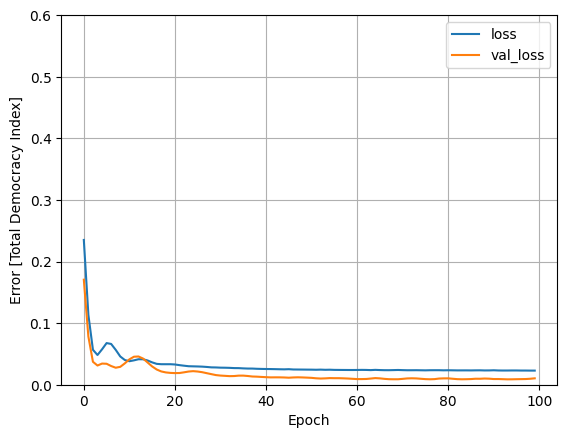

In [31]:
#Defines plot loss function to visualize change in loss function over time.
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.6])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Total Democracy Index]')
  plt.legend()
  plt.grid(True)

plot_loss(history)
#In the provided code, 'loss' refers to the training loss or the error computed during each training epoch.
#The training loss measures the discrepancy between the predicted output and the true output for the training data.
#It is used to update the model's weights and improve its performance. The goal is to minimize this loss function.

#'val_loss' refers to the validation loss or the error computed on a separate validation dataset during each training epoch.
#The validation loss is used to evaluate the model's performance on data that it has not seen during training.
#It helps to monitor the model's generalization capability and detect overfitting or underfitting.
#Like the training loss, the goal is to minimize the validation loss.


In [32]:
#Stores the results of the dnn_model in the dictionary test_results and calculates the mean aboslute error.
test_results = {}

test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Total Democracy Index]'])

,dnn_model
Mean absolute error [Total Democracy Index],0.579577


1/1 [==============================] - 0s 92ms/step


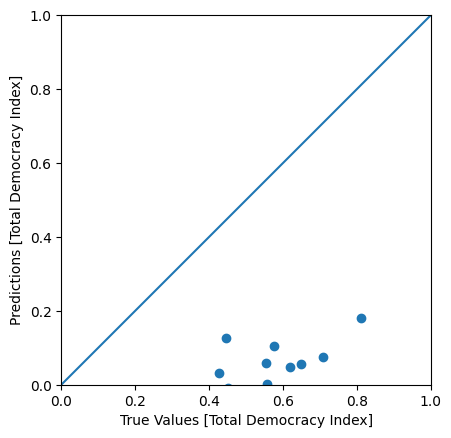

In [33]:
#Creates a visualization of the predicted values versus actual values to establish an understanding of the
#effectiveness of the model. This model appears to be relatively accurate, sticking with moderate strength
#to a exact positive correlation.
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Total Democracy Index]')
plt.ylabel('Predictions [Total Democracy Index]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [34]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((test_predictions - test_labels) ** 2)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.36732380535402265
Root Mean Squared Error (RMSE): 0.6060724423317915


In [35]:
#The following code lays the groundwork to create feature importance analysis, which evaluates the impact of manipulating
#each of our six predictors on democracy. The results are then stored in the feature_importances dictionary.

feature_importances = {}

# Calculate the baseline MSE
baseline_predictions = dnn_model.predict(test_features)
baseline_mse = mean_squared_error(test_labels, baseline_predictions)

for feature in test_features.columns:
    test_features_permuted = test_features.copy()
    test_features_permuted[feature] = np.random.permutation(test_features_permuted[feature].values)
    permuted_predictions = dnn_model.predict(test_features_permuted)
    permuted_mse = mean_squared_error(test_labels, permuted_predictions)
    feature_importances[feature] = permuted_mse - baseline_mse  # calculate the increase in MSE

1/1 [==============================] - 0s 11ms/step


In [36]:
print(feature_importances)

{'Family Index': 0.028804621805022634, 'Friends Index': 0.0077604806043525265, 'Leisure Index': -0.0066893829525586646, 'Politics Index': -0.007959418158542064, 'Religion Index': 0.0158903409742176, 'Work Index': 0.02907897656350905}


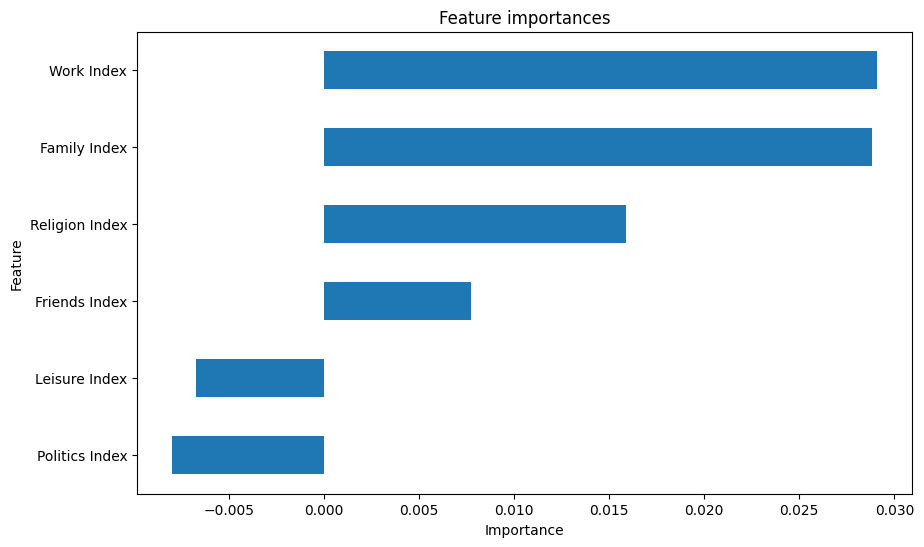

In [37]:
#Establishes the fundamental code for running a single feature analysis using a specific DNN.

# Convert feature_importances to a series for easier plotting
importances_series = pd.Series(feature_importances)

# Sort importances
importances_series = importances_series.sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
importances_series.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importances')
plt.show()


1/1 [==============================] - 0s 12ms/step


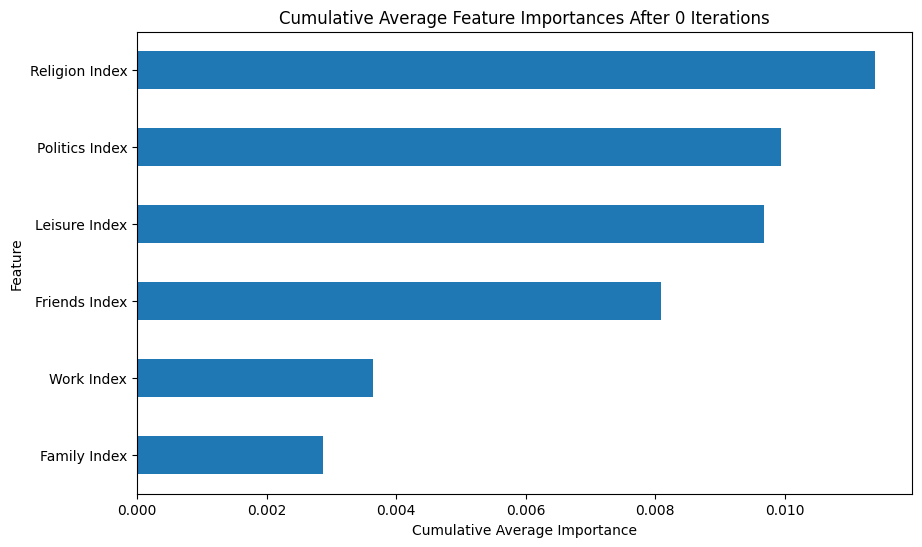

1/1 [==============================] - 0s 16ms/step


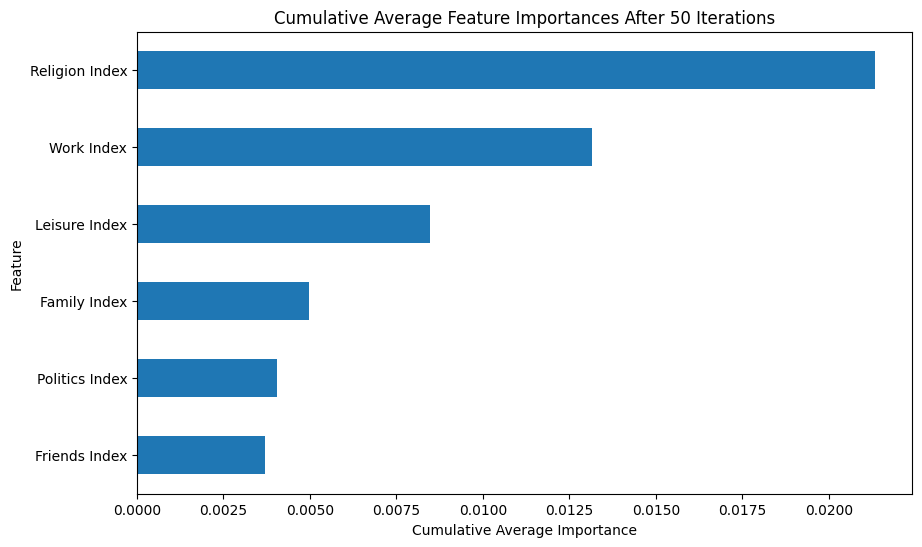

1/1 [==============================] - 0s 16ms/step


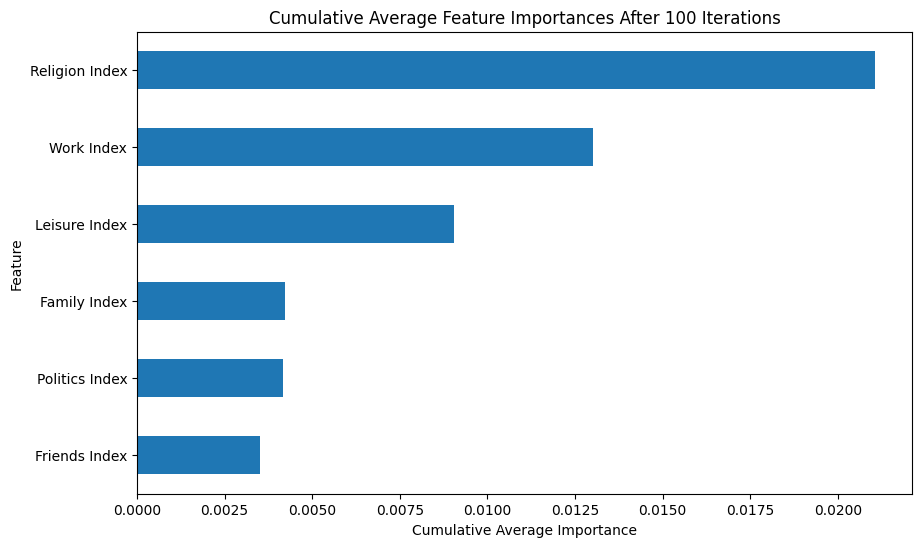

1/1 [==============================] - 0s 16ms/step


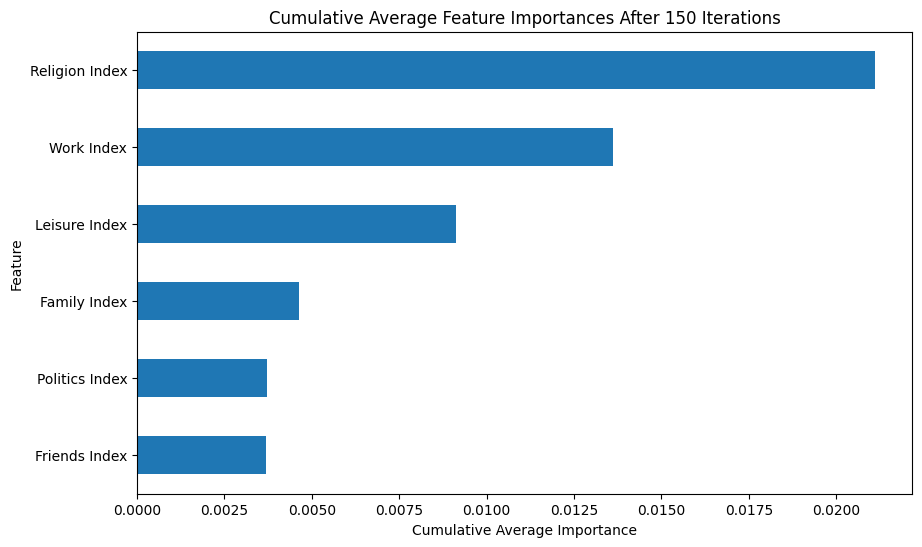

1/1 [==============================] - 0s 23ms/step


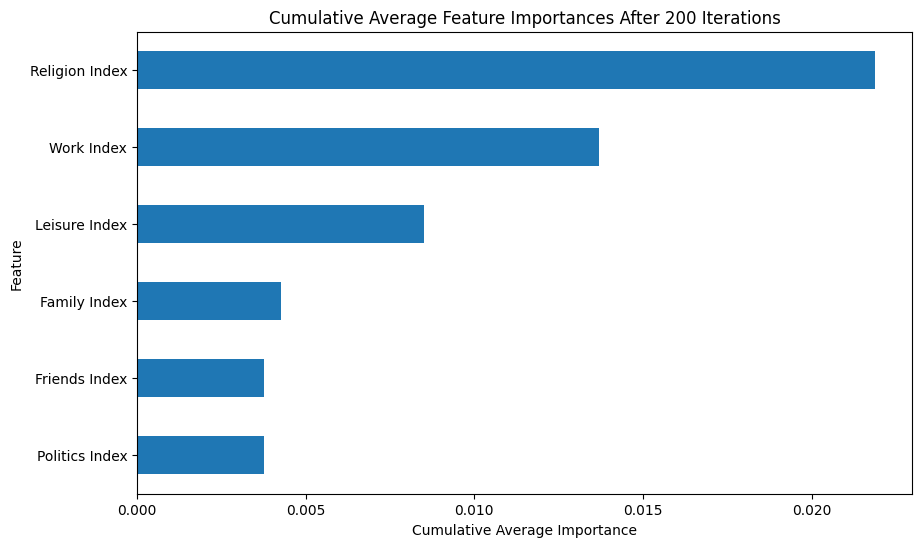

1/1 [==============================] - 0s 34ms/step


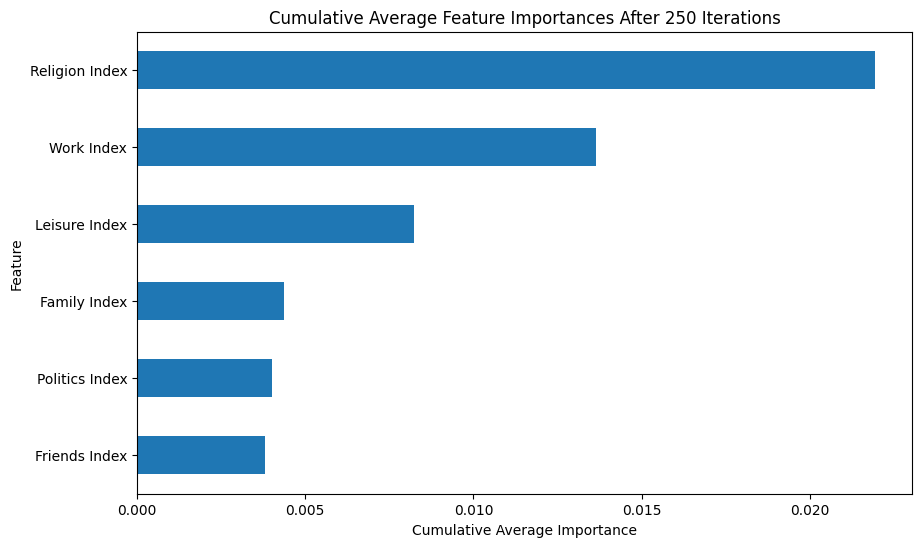

1/1 [==============================] - 0s 16ms/step
T-tests: {'Family Index': TtestResult(statistic=17.889886150704903, pvalue=3.5951045763651944e-49, df=299), 'Friends Index': TtestResult(statistic=17.019777262928297, pvalue=6.8065942094183125e-46, df=299), 'Leisure Index': TtestResult(statistic=21.873753571165278, pvalue=5.3044750722958956e-64, df=299), 'Politics Index': TtestResult(statistic=14.42972864409528, pvalue=3.478506020422217e-36, df=299), 'Religion Index': TtestResult(statistic=30.251951894663534, pvalue=5.459472512610331e-93, df=299), 'Work Index': TtestResult(statistic=28.09063667433398, pvalue=7.32460144146411e-86, df=299)}


In [38]:
#Runs feature analysis for 300 uniquely differentitated DNN models and runs a statistical validity test to 
#determine signficance for each of the six predictors.

#Import libraries necessary for analysis
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a dictionary to hold lists of importances for each feature
feature_importances = {feature: [] for feature in test_features.columns}
cumulative_averages = {feature: [] for feature in test_features.columns}

# Calculate permutation importances 300 times
for i in range(300):
    # Rebuild and retrain the model from scratch
    dnn_model = optimized_build_and_compile_model(normalizer)
    dnn_model.fit(train_features, train_labels, epochs=86, verbose=0)  
    
    # Calculate the baseline MSE
    baseline_predictions = dnn_model.predict(test_features)
    baseline_mse = mean_squared_error(test_labels, baseline_predictions)
    
    for feature in test_features.columns:
        test_features_permuted = test_features.copy()
        test_features_permuted[feature] = np.random.permutation(test_features_permuted[feature].values)
        permuted_predictions = dnn_model.predict(test_features_permuted)
        permuted_mse = mean_squared_error(test_labels, permuted_predictions)
        
        # Add the importance of the feature to the list in feature_importances
        feature_importances[feature].append(permuted_mse - baseline_mse)
        
        # Calculate and save the current cumulative average
        cumulative_averages[feature].append(np.mean(feature_importances[feature]))
    
    # Every 50 iterations, plot the current cumulative averages
    if i % 50 == 0:
        cumulative_averages_series = pd.Series({feature: averages[-1] for feature, averages in cumulative_averages.items()})
        cumulative_averages_series = cumulative_averages_series.sort_values()
        plt.figure(figsize=(10, 6))
        cumulative_averages_series.plot(kind='barh')
        plt.xlabel('Cumulative Average Importance')
        plt.ylabel('Feature')
        plt.title('Cumulative Average Feature Importances After {} Iterations'.format(i))
        plt.show()

# Perform t-tests
t_tests = {feature: stats.ttest_1samp(importances, 0) for feature, importances in feature_importances.items()}

print("T-tests:", t_tests)


In [39]:
# Final values of feature importances
final_feature_importances = {feature: importances[-1] for feature, importances in feature_importances.items()}
print("Final feature importances:", final_feature_importances)

# Final values of cumulative averages
final_cumulative_averages = {feature: averages[-1] for feature, averages in cumulative_averages.items()}
print("Final cumulative averages:", final_cumulative_averages)


Final feature importances: {'Family Index': 0.012215728985522378, 'Friends Index': 0.0004327981222982634, 'Leisure Index': 0.013761647999384785, 'Politics Index': -0.0036542594275430287, 'Religion Index': 0.04288870503931359, 'Work Index': 0.0070499854577118215}
Final cumulative averages: {'Family Index': 0.004386693905223228, 'Friends Index': 0.0037297467910678748, 'Leisure Index': 0.008367675088664933, 'Politics Index': 0.0040899969301236485, 'Religion Index': 0.021658104308588354, 'Work Index': 0.013713894981392118}
